In [2]:
import tensorflow
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow.keras.layers as layer
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [3]:
train_augmentation = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=20,
    zoom_range=0.1,
    horizontal_flip=True,
    width_shift_range=0.1,   
    height_shift_range=0.1 )
train_gen = train_augmentation.flow_from_directory(
        "/Users/ocelot/Desktop/Archive/train",
        target_size=(100,150),
        batch_size=32,
        class_mode="categorical",
        color_mode="grayscale",
        seed=42

)

val_gen = ImageDataGenerator(rescale = 1./255).flow_from_directory(
    "/Users/ocelot/Desktop/Archive/validation",
     target_size=(100,150),
     batch_size=32,
     class_mode="categorical",
     color_mode="grayscale",
     seed=42)

    

Found 1531 images belonging to 3 classes.
Found 438 images belonging to 3 classes.


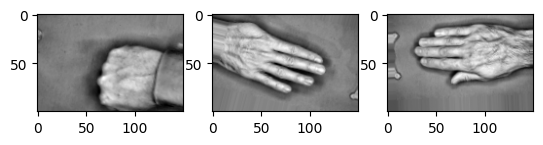

In [4]:
train_gen.batch_size = 3
fig, ax =  plt.subplots(1,3)
immagini = next(train_gen)
for n,i in enumerate(immagini[0]):
    ax[n].imshow(i, cmap='gray')
train_gen.batch_size=32

In [5]:
early_stop = EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True)
model = tensorflow.keras.models.Sequential([
    layer.InputLayer(shape=(100,150,1)),
    layer.Conv2D(filters=(32), kernel_size=(3,3), activation="relu"),
    layer.MaxPooling2D(pool_size=(2,2)),
    layer.Conv2D(filters=(64), kernel_size=(3,3), activation="relu"),
    layer.MaxPooling2D(pool_size=(2,2)),
    layer.Flatten(),
    layer.Dense(128, activation="relu"),
    layer.Dense(3, activation="softmax")
])

In [6]:
%%time
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
history=model.fit(train_gen, epochs=50, callbacks=[early_stop], validation_data=val_gen)

Epoch 1/50


/Users/ocelot/tf/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


48/48 ━━━━━━━━━━━━━━━━━━━━ 5s 103ms/step - accuracy: 0.3828 - loss: 1.2071 - val_accuracy: 0.4772 - val_loss: 0.9848
Epoch 2/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 5s 101ms/step - accuracy: 0.6244 - loss: 0.8412 - val_accuracy: 0.7374 - val_loss: 0.5567
Epoch 3/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 5s 101ms/step - accuracy: 0.7753 - loss: 0.5892 - val_accuracy: 0.8813 - val_loss: 0.3613
Epoch 4/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 5s 101ms/step - accuracy: 0.8570 - loss: 0.4021 - val_accuracy: 0.9361 - val_loss: 0.2208
Epoch 5/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 5s 101ms/step - accuracy: 0.9001 - loss: 0.3064 - val_accuracy: 0.9452 - val_loss: 0.2149
Epoch 6/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 5s 102ms/step - accuracy: 0.9020 - loss: 0.2933 - val_accuracy: 0.9543 - val_loss: 0.1783
Epoch 7/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 5s 105ms/step - accuracy: 0.9190 - loss: 0.2266 - val_accuracy: 0.8744 - val_loss: 0.3073
Epoch 8/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 5s 103ms/step - accuracy: 0.9301 - loss: 0.2111 - val_accuracy: 0.9475 - val_

In [7]:
test_gen = ImageDataGenerator(rescale = 1./255).flow_from_directory(
    "/Users/ocelot/Desktop/Archive/test",
     target_size=(100,150),
     batch_size=32,
     class_mode="categorical",
     color_mode="grayscale",
     shuffle=False,
     seed=42)


Found 219 images belonging to 3 classes.


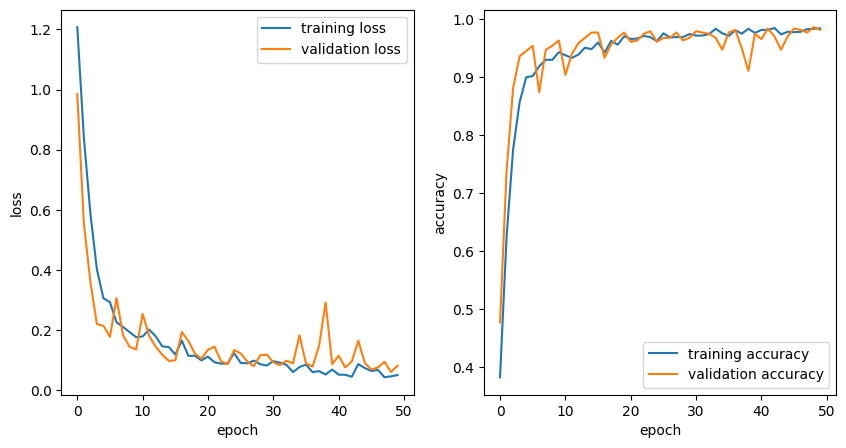

In [8]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches(10,5)
ax[0].plot(history.history["loss"], label="training loss")
ax[0].plot(history.history["val_loss"], label="validation loss")
ax[0].set_xlabel("epoch")
ax[0].set_ylabel("loss")
ax[0].legend()
ax[1].plot(history.history["accuracy"], label="training accuracy")
ax[1].plot(history.history["val_accuracy"], label="validation accuracy")
ax[1].set_xlabel("epoch")
ax[1].set_ylabel("accuracy")
ax[1].legend()

In [9]:
testLoss, testAccuracy = model.evaluate(test_gen)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9954 - loss: 0.0116


In [21]:
import numpy as np
from sklearn.metrics import classification_report
pred = model.predict(test_gen)
pred = np.argmax(pred, axis=1)
real_label = test_gen.classes
keys = test_gen.class_indices.keys()
keys = list(keys)
report = classification_report(real_label, pred, target_names=keys, output_dict=True)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


In [22]:
report["scissors"]

{'precision': 0.9868421052631579,
 'recall': 1.0,
 'f1-score': 0.9933774834437086,
 'support': 75.0}

In [23]:
report["rock"]

{'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 73.0}

In [24]:
report["paper"]

{'precision': 1.0,
 'recall': 0.9859154929577465,
 'f1-score': 0.9929078014184397,
 'support': 71.0}

Label predetta: scissors Label vera: paper


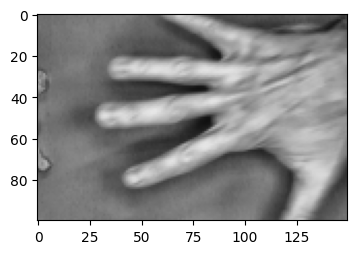

In [39]:
import cv2
errori_indice=[]
for i in range(len(real_label)):
    if real_label[i] != pred[i]:
        errori_indice.append(i)
file = test_gen.filepaths
errori = {"immagini":[], "LabelGiusta":[], "LabelPred":[]}
for i in errori_indice:
    plt.figure(figsize=(4, 4))
    plt.imshow(cv2.cvtColor(cv2.imread(file[i]), cv2.COLOR_BGR2RGB))
    print("Label predetta: {} Label vera: {}".format(keys[pred[i]], keys[real_label[i]]))